# Parcial: Construcción e implementación de , Random Forest 

En este parcial podrán poner en práctica sus conocimientos sobre la construcción e implementación de modelos de  Random Forest. El taller está constituido por 8 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción precio de automóviles

En este parcial se usará el conjunto de datos de Car Listings de Kaggle donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#librerias
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [3]:
# Importación de librerías
%matplotlib inline
import pandas as pd

# Lectura de la información de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')

# Preprocesamiento de datos para el taller
data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
data = data.join(pd.get_dummies(data['Model'], prefix='M'))
data = data.drop(['Model'], axis=1)

# Visualización dataset
data.head()

,Price,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE
7,21995,2014,6480,0,0,0,1,0,0,0
11,13995,2014,39972,0,0,0,0,1,0,0
167,17941,2016,18989,0,0,0,0,0,1,0
225,12493,2014,51330,0,0,0,1,0,0,0
270,7994,2007,116065,0,1,0,0,0,0,0


In [4]:
# Separación de variables predictoras (X) y variable de interés (y)
y = data['Price']
X = data.drop(['Price'], axis=1)

In [5]:
# Separación de datos en set de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 0 - exploracion y analisis de datos 
Los estudiantes deben analizar cuidadosamente los datos del conjunto dataTrain_carListings, identificando posibles valores nulos o inconsistencias. En caso de encontrar datos faltantes, deberán aplicar técnicas de imputación adecuadas para completar la información de manera coherente. Posteriormente, se espera que realicen una exploración visual mediante gráficos que permitan comprender la distribución y las relaciones entre las variables principales.

Valores nulos de cada columna:
Price          0
Year           0
Mileage        0
M_Camry        0
M_Camry4dr     0
M_CamryBase    0
M_CamryL       0
M_CamryLE      0
M_CamrySE      0
M_CamryXLE     0
dtype: int64


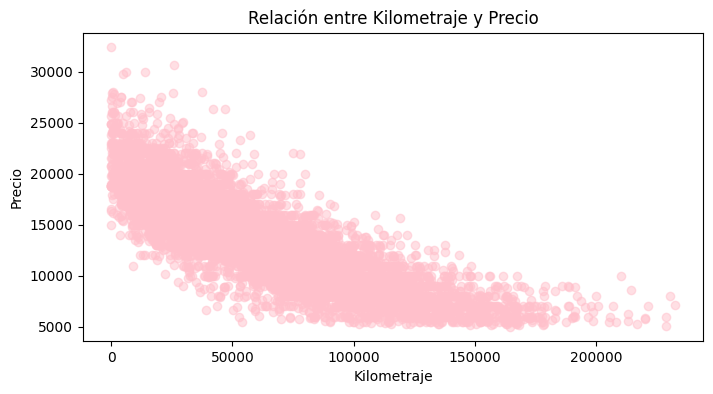

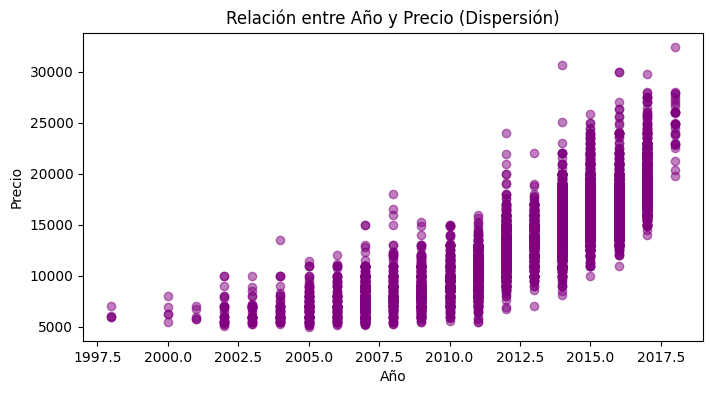

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')

data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
data = data.join(pd.get_dummies(data['Model'], prefix='M'))


data = data.drop(['Model'], axis=1)

print("Valores nulos de cada columna:")

print(data.isnull().sum())

data = data.fillna(data.median(numeric_only=True))


plt.figure(figsize=(8,4))
plt.scatter(data['Mileage'], data['Price'], alpha=0.5, color='pink')
plt.title('Relación entre Kilometraje y Precio')
plt.xlabel('Kilometraje')
plt.ylabel('Precio')
plt.show()

plt.figure(figsize=(8,4))
plt.scatter(data['Year'], data['Price'], alpha=0.5, color="purple")
plt.title('Relación entre Año y Precio (Dispersión)')
plt.xlabel('Año')
plt.ylabel('Precio')
plt.show()



### Punto 1 - Random forest con librería

En la celda 1, usando la librería sklearn entrenen un modelo de Randon Forest para regresion  y comenten sobre el desempeño del modelo.

 RESULTADOS DEL MODELO RANDOM FOREST 
 MSE  (Error cuadrático medio): 3,116,678.92
 MAE  (Error absoluto medio):   1,314.42
 R²   (Coeficiente de determinación): 0.7962


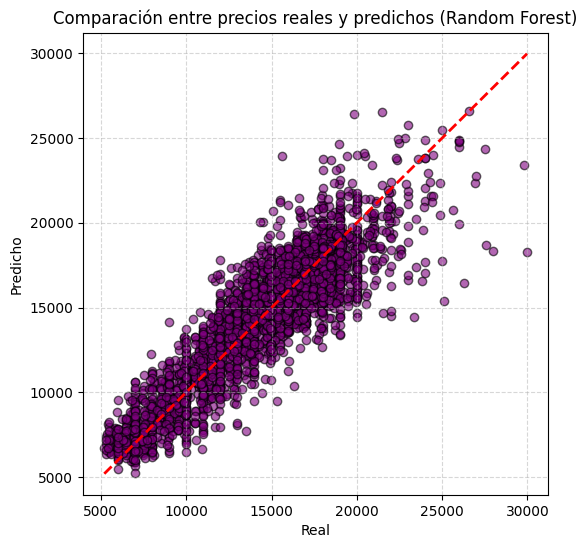

In [25]:
# Celda 1

from sklearn.ensemble import RandomForestRegressor   
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
import numpy as np

y = data['Price']     
X = data.drop(['Price'], axis=1) 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

rf = RandomForestRegressor(
    random_state=42,     
    n_estimators=100,    
    max_depth=None,   
    n_jobs=-1  
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


mse = mean_squared_error(y_test, y_pred) 
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)             


print(" RESULTADOS DEL MODELO RANDOM FOREST ")
print(f" MSE  (Error cuadrático medio): {mse:,.2f}")
print(f" MAE  (Error absoluto medio):   {mae:,.2f}")
print(f" R²   (Coeficiente de determinación): {r2:.4f}")

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='purple', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Comparación entre precios reales y predichos (Random Forest)')
plt.xlabel('Real')
plt.ylabel('Predicho')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()





### Punto 2 - Calibración de parámetros Random forest

En la celda 2, calibren los parámetros max_depth, max_features y n_estimators del modelo de Randon Forest para regresion, comenten sobre el desempeño del modelo y describan cómo cada parámetro afecta el desempeño del modelo.

In [28]:
# Celda 2

from sklearn.model_selection import GridSearchCV

malla_parametros = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), malla_parametros, 
                           cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

mejores_params = grid_search.best_params_
print(" Mejores parámetros encontrados:")
for clave, valor in mejores_params.items():
    print(f" - {clave}: {valor}")




 Mejores parámetros encontrados:
 - max_depth: 10
 - max_features: sqrt
 - n_estimators: 200



 Modelo entrenado exitosamente con los mejores parametros.

 Resultados del modelo optimizado (Random Forest):
   - Error cuadrático medio (MSE): 2,446,865.97
   - Error absoluto medio (MAE): 1,147.20
   - Coeficiente de determinación (R²): 0.8400


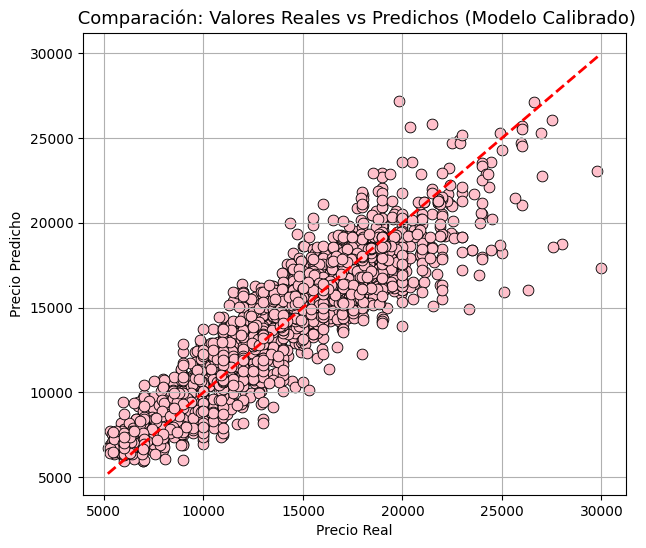

In [9]:
#Encontrar los mejores hiperparametros: 

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

best_rf = grid_search.best_estimator_

best_rf.fit(X_train, y_train)

print("\n Modelo entrenado exitosamente con los mejores parametros.\n")

y_pred_best = best_rf.predict(X_test)

mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(" Resultados del modelo optimizado (Random Forest):")
print(f"   - Error cuadrático medio (MSE): {mse_best:,.2f}")
print(f"   - Error absoluto medio (MAE): {mae_best:,.2f}")
print(f"   - Coeficiente de determinación (R²): {r2_best:.4f}")


plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_test, y=y_pred_best, color="pink", s=60, edgecolor="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(" Comparación: Valores Reales vs Predichos (Modelo Calibrado)", fontsize=13)
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.grid(True)
plt.show()



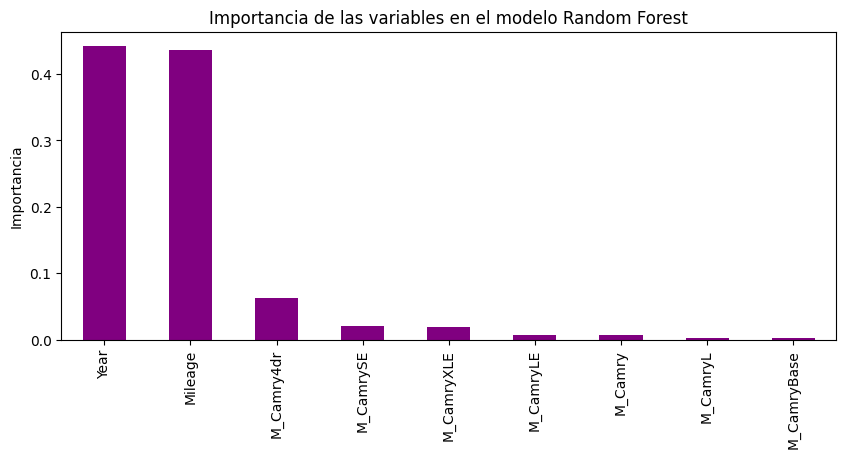

Conclusion: las variable con mayor importancia para el modelo son el año (Year) y el kilometraje (Mileage)


In [20]:
#Importancia de los predictores

importances = pd.Series(best_rf.feature_importances_, index=X.columns)

plt.figure(figsize=(10,4))
importances.sort_values(ascending=False).plot(kind='bar', color='purple')
plt.title('Importancia de las variables en el modelo Random Forest')
plt.ylabel('Importancia')
plt.show()

print("Conclusion: las variable con mayor importancia para el modelo son el año (Year) y el kilometraje (Mileage)")

### Punto 3 - análisis de resultados, gracias y conclusiones
En la celda 3


  ANÁLISIS DE RESULTADOS Y CONCLUSIONES

Después de entrenar y calibrar el modelo Random Forest para predecir el precio de los autos Camry,
se obtuvo un rendimiento con un R² ≈ 0.84, MAE ≈ 1,147 y MSE ≈ 2.44e6. 
Significa que el modelo explica cerca del 84% de la variabilidad en los precios de los vehículos.

Las variables 'Year' (año) y 'Mileage' (kilometraje) fueron las más influyentes, 




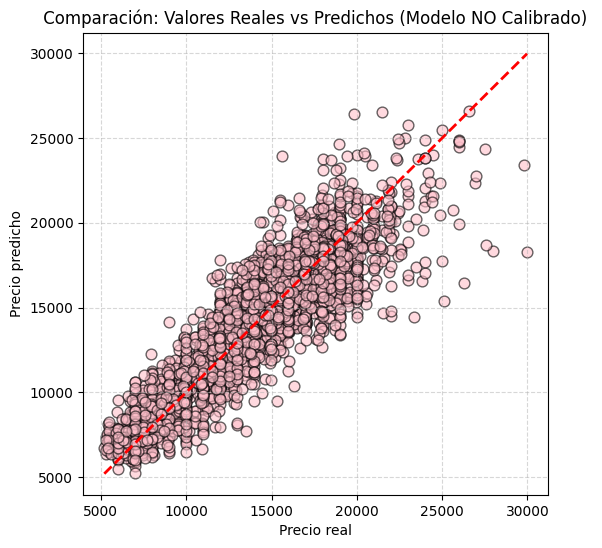

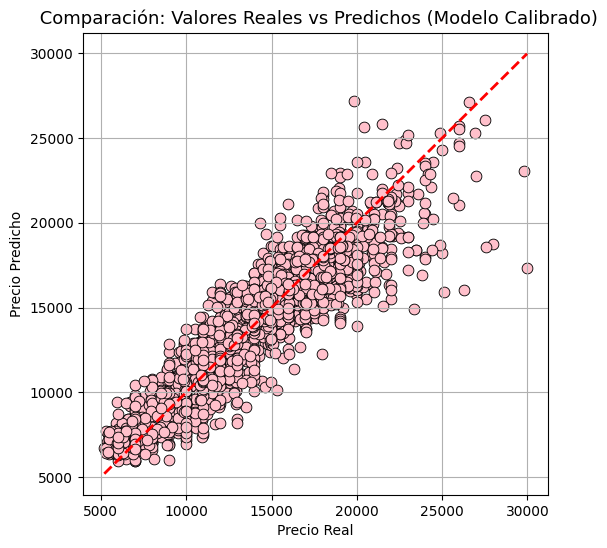

In [19]:
#celda 3

import matplotlib.pyplot as plt
import seaborn as sns

print("""
  ANÁLISIS DE RESULTADOS Y CONCLUSIONES

Después de entrenar y calibrar el modelo Random Forest para predecir el precio de los autos Camry,
se obtuvo un rendimiento con un R² ≈ 0.84, MAE ≈ 1,147 y MSE ≈ 2.44e6. 
Significa que el modelo explica cerca del 84% de la variabilidad en los precios de los vehículos.

Las variables 'Year' (año) y 'Mileage' (kilometraje) fueron las más influyentes, 

""")

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='pink', s=60, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(' Comparación: Valores Reales vs Predichos (Modelo NO Calibrado) ')
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred_best, color="pink", s=60, edgecolor="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(" Comparación: Valores Reales vs Predichos (Modelo Calibrado)", fontsize=13)
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.grid(True)
plt.show()



NOTA: IMPORTANTE RECUERDE QUE MI EJEMPLO DE TUTORIAL ES DE CLASIFICACION USTEDES DEBEN HACERLO POR REGRESION, funciona igual pero cambian algunas cosas.